In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter as pf

In [2]:
##read in Pb-214 data
with open(r"C:\srimnotes\15nm.txt") as file:
    a = file.read().splitlines()

In [3]:
##arrange Pb-214 data as a tuple of angle arrays. deg=degree
deg=np.empty((10,10000))

x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    y = 0
    for num in ar:
        deg[y,x] = num
        y=y+1
    x=x+1
    
print(deg[2,1000])
line

520.0


'2.90E+02\t3.68E+02\t4.42E+02\t2.97E+02\t3.34E+02\t7.69E+01\t1.70E+02\t2.97E+02\t\t'

In [4]:
##figure out the scaling coefficients for each angle
coefs=np.empty(10)

x=0
for col in deg:
    coefs[x]=math.sin(math.pi*col[0]/180)
    x+=1
print(deg[9])

[89.  32.8 74.7 ...  0.   0.   0. ]


In [5]:
##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
bigArray=[]
dweights=[]

x=0
for col in deg:
    bigArray=np.append(bigArray,col[1:])
    dumb=np.empty(9999)
    y=0
    for num in col[1:]:
        dumb[y]=coefs[x]
        y+=1
    dweights=np.append(dweights,dumb)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
np.where(bigArray==0)[0]

array([], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

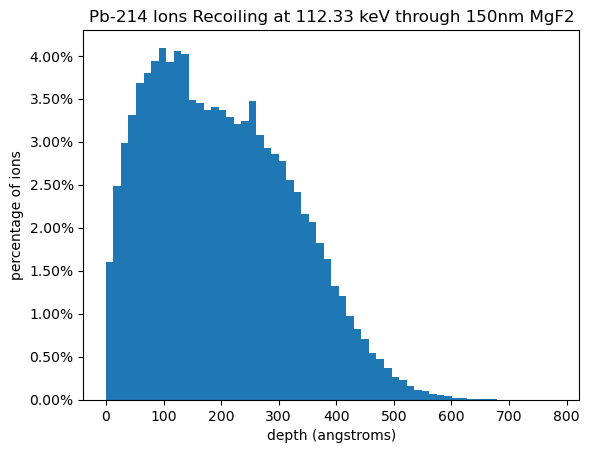

In [6]:
##make histogram
n = sum(dweights)
g=5
h214=plt.hist(bigArray, bins=60, weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through 150nm MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

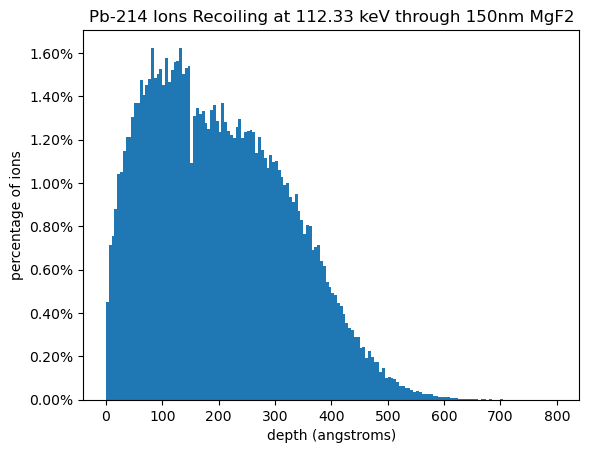

In [7]:
##make histogram
n = sum(dweights)
h2142=plt.hist(bigArray, bins=np.arange(0,800+g,g), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through 150nm MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

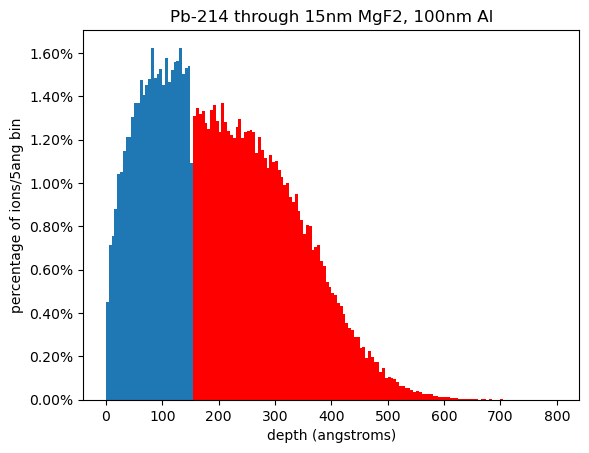

In [8]:
##all the bars in the aluminum will now be green
fig, ax = plt.subplots()
N, bins, patches=ax.hist(bigArray, bins=np.arange(0,800+g,g), weights=dweights/(n))
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/5ang bin")
plt.title("Pb-214 through 15nm MgF2, 100nm Al")
plt.gca().yaxis.set_major_formatter(pf(1))
for i in range(0,len(patches)):
    if h2142[1][i] >150:
       patches[i].set_facecolor('r')
plt.show

In [9]:
##calc the % of ions in the al
al=0
for x in range(len(h2142[0])):
    if h2142[1][x] > 150:
        al += h2142[0][x]
        x+=1

print("{}% of ions end in the Al layer!".format(al*100))
print("The maximum penetration depth is {} angstroms.".format(h2142[1][len(h2142[1])-1]))


59.123967030170064% of ions end in the Al layer!
The maximum penetration depth is 800 angstroms.


In [10]:
##find the first bin which is greater than 150, which we'll call bt
bt=0
x=0
y=1
while y==1:
    if h2142[1][x] > 150:
        bt=x
        y=0
    else:
        x+=1
        
bt

31

In [11]:
del a
##read in Pb-210, surface
with open(r"C:\srimnotes\pb210lxe.txt") as file:
    a = file.read().splitlines()

In [12]:
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar

deg=np.zeros((10,2999))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    




In [13]:
del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)
    
coefs

array([0.        , 0.17364818, 0.34202014, 0.5       , 0.64278761,
       0.76604444, 0.8660254 , 0.93969262, 0.98480775, 0.9998477 ])

In [14]:
##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    

<function matplotlib.pyplot.show(close=None, block=None)>

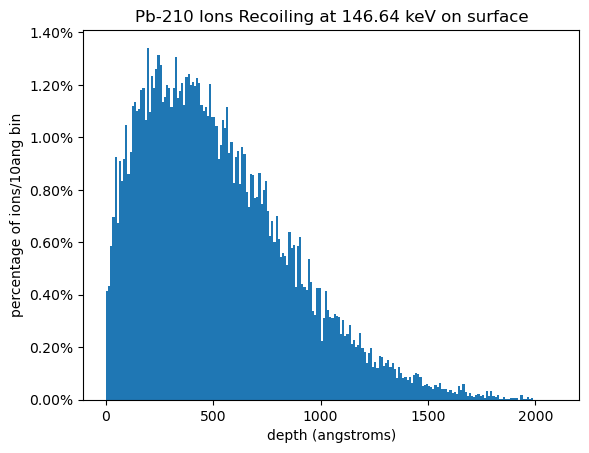

In [15]:
##make histogram
n = sum(dweights)
w=10
h2100=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV on surface")
plt.gca().yaxis.set_major_formatter(pf(1))

plt.show


In [16]:
del a
##read in Pb-210, 50nm
with open(r"C:\srimnotes\pb21050.txt") as file:
    a = file.read().splitlines()

In [17]:
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,2999))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    




In [18]:
del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)


In [19]:
##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    

<function matplotlib.pyplot.show(close=None, block=None)>

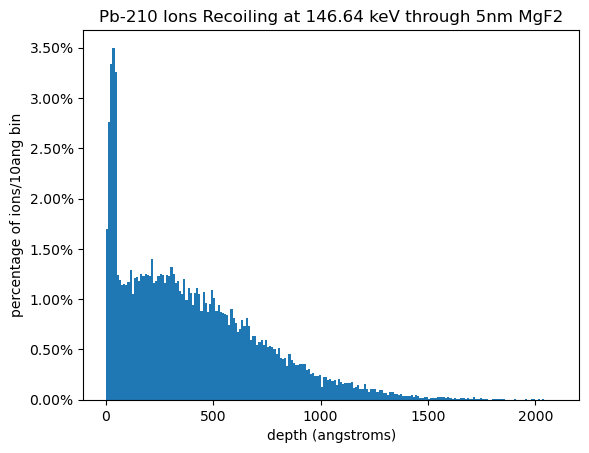

In [20]:
##make histogram
n = sum(dweights)
h21050=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 5nm MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

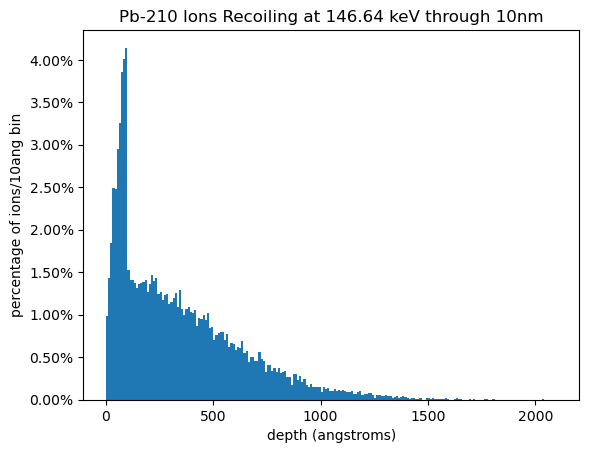

In [21]:
del a
##read in Pb-210, 100nm
with open(r"C:\srimnotes\pb210100.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3000))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210100=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 10nm")
plt.gca().yaxis.set_major_formatter(pf(1))

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

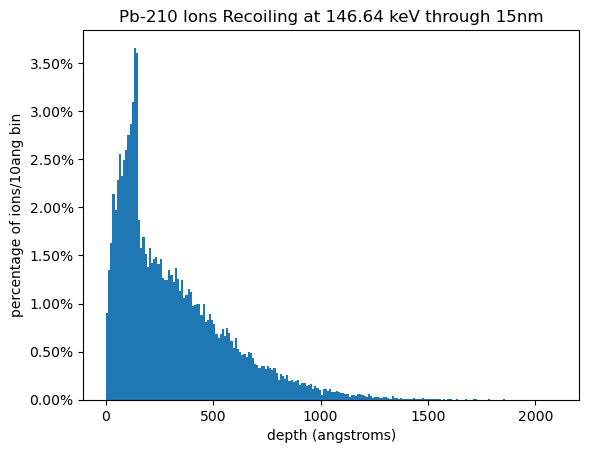

In [22]:
del a
##read in Pb-210, 150nm
with open(r"C:\srimnotes\pb210150.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3000))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210150=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 15nm")
plt.gca().yaxis.set_major_formatter(pf(1))

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

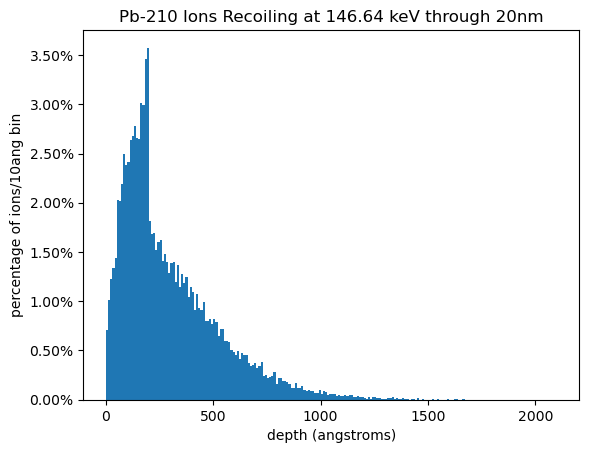

In [23]:
del a
##read in Pb-210, 200nm
with open(r"C:\srimnotes\pb210200.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3000))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210200=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 20nm")
plt.gca().yaxis.set_major_formatter(pf(1))

plt.show


C:\Users\etcha\AppData\Local\Temp\ipykernel_17912\3866654040.py:15: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  ar = np.fromstring(line, dtype=float, sep="\t")


<function matplotlib.pyplot.show(close=None, block=None)>

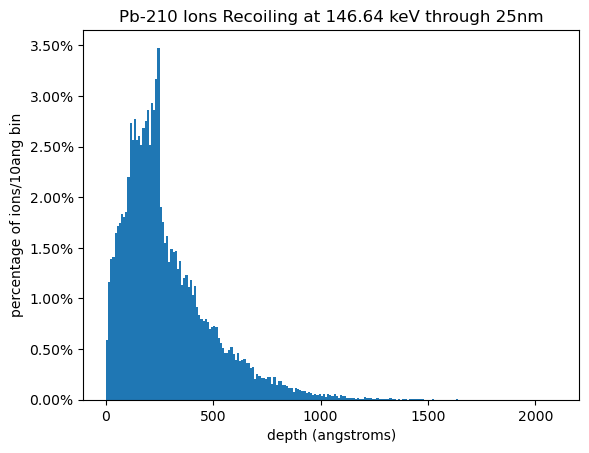

In [24]:
del a
##read in Pb-210, 250nm
with open(r"C:\srimnotes\pb210250.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3010))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210250=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 25nm")
plt.gca().yaxis.set_major_formatter(pf(1))

plt.show


In [25]:
h210200[0]

array([7.11026690e-03, 1.01430091e-02, 1.22523544e-02, 1.33894175e-02,
       1.43601847e-02, 2.02743202e-02, 2.01767477e-02, 2.19020468e-02,
       2.49832430e-02, 2.38439634e-02, 2.41126823e-02, 2.63652405e-02,
       2.68179248e-02, 2.78239672e-02, 2.65565863e-02, 2.64893886e-02,
       3.01439687e-02, 2.99743934e-02, 3.45759805e-02, 3.57450477e-02,
       1.81768297e-02, 1.67797056e-02, 1.69578427e-02, 1.52159219e-02,
       1.59673663e-02, 1.62314722e-02, 1.40804226e-02, 1.47771692e-02,
       1.39456592e-02, 1.28387626e-02, 1.38490327e-02, 1.39682573e-02,
       1.19889445e-02, 1.36386358e-02, 1.14907117e-02, 1.27757255e-02,
       1.18559784e-02, 1.24255098e-02, 1.04539385e-02, 1.14149484e-02,
       1.09481854e-02, 9.11178161e-03, 1.07766159e-02, 9.27327374e-03,
       9.08047072e-03, 9.97284781e-03, 8.04263715e-03, 7.98810023e-03,
       8.23020988e-03, 7.64658962e-03, 8.15530607e-03, 7.86564285e-03,
       6.46670148e-03, 7.16199670e-03, 7.22453063e-03, 5.93578170e-03,
      

<function matplotlib.pyplot.show(close=None, block=None)>

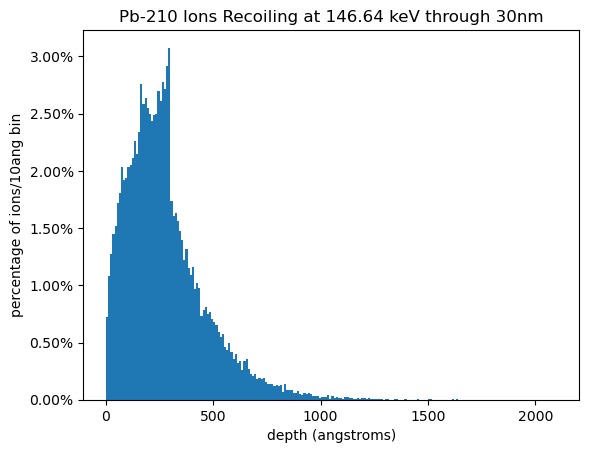

In [26]:
del a
##read in Pb-210, 300nm
with open(r"C:\srimnotes\pb210300.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3010))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210300=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 30nm")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

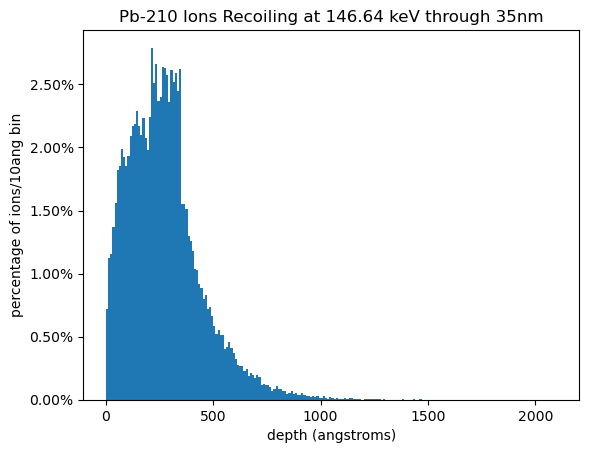

In [27]:
del a
##read in Pb-210, 350nm
with open(r"C:\srimnotes\pb210350.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3010))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210350=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 35nm")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

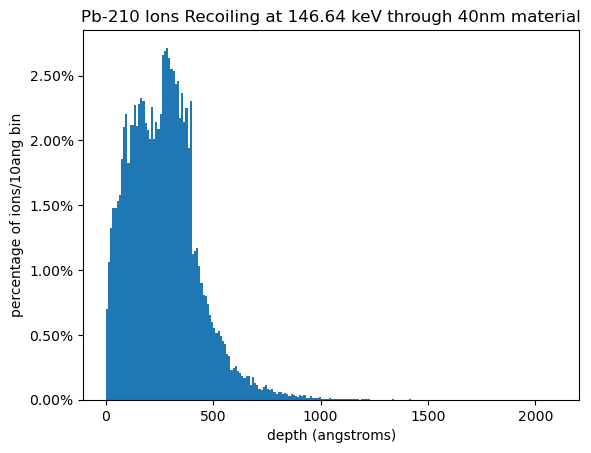

In [28]:
del a
##read in Pb-210, 400nm
with open(r"C:\srimnotes\pb210400.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3010))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210400=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 40nm material")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

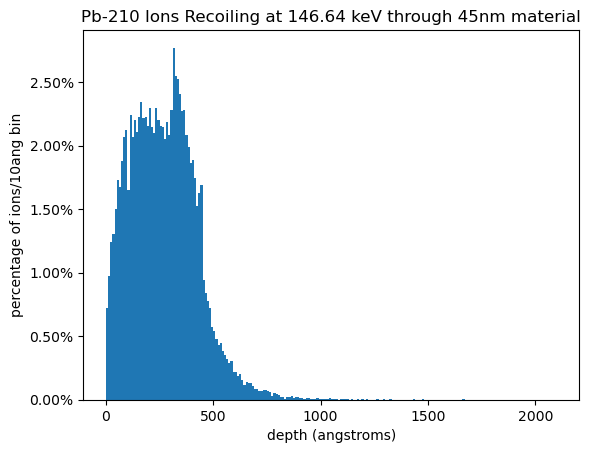

In [29]:
del a
##read in Pb-210, 450nm
with open(r"C:\srimnotes\pb210450.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3010))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210450=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 45nm material")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

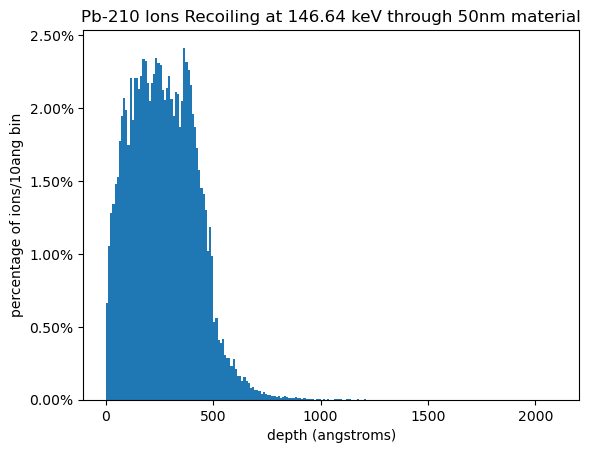

In [30]:
del a
##read in Pb-210, 500nm
with open(r"C:\srimnotes\pb210500.txt") as file:
    a = file.read().splitlines()
    
##arrange Pb-210 data as a tuple of angle arrays. deg=degree
del deg, ar, lens

deg=np.zeros((10,3010))
lens = np.zeros(10)


x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    bb = len(ar)
    if bb == 10:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,1])
    elif bb == 9:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,1,0])
    elif bb == 8:
        lens=np.add(lens,[1,1,1,1,1,1,1,1,0,0])
    elif bb == 7:
        lens=np.add(lens,[1,1,1,1,1,1,1,0,0,0])
    elif bb == 6:
        lens=np.add(lens,[1,1,1,1,1,1,0,0,0,0])
    elif bb == 5:
        lens=np.add(lens,[1,1,1,1,1,0,0,0,0,0])
    
    for y in range(len(ar)):
        deg[y,x] = ar[y]
        
    x=x+1
    


del coefs
coefs=np.zeros(10)
##figure out the scaling coefficients for each angle


for i in range(10):
    coefs[i]=math.sin(math.pi*deg[i][0]/180)

##first reformat the tuple deg into a big array. Then stretch coefs into the dimensions of bigarray,
## repeating values for data of the same angle.
del bigArray,dweights,dweight
bigArray=[]
dweights=[]

x=0
for col in deg:
    dweight=np.full(int(lens[x]),coefs[x])
    for y in range(int(lens[x])):
        bigArray=np.append(bigArray,col[1+y])
    dweights=np.append(dweights,dweight)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
    
##make histogram
n = sum(dweights)
h210500=plt.hist(bigArray, bins=np.arange(0,2100+w,w), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through 50nm material")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show


In [31]:
##now we make the combined histogram of Pb-214+Pb-210

hugeArray=[]
cweights=[]

i=0
for p1 in h2142[0]:
    if h2142[1][i] < 25:
        for p2 in h2100[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h2100[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 75 and h2142[1][i] >= 25:
        for p2 in h21050[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h21050[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 125 and h2142[1][i] >=75:
        for p2 in h210100[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210100[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 175 and h2142[1][i] >=125:
        for p2 in h210150[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210150[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 225 and h2142[1][i] >=175:
        for p2 in h210200[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210200[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 275 and h2142[1][i] >=225:
        for p2 in h210250[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210250[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 325 and h2142[1][i] >=275:
        for p2 in h210300[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210300[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 375 and h2142[1][i] >= 325:
        for p2 in h210350[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h2100[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 425 and h2142[1][i] >=375:
        for p2 in h210400[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210400[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] < 475 and h2142[1][i] >=425:
        for p2 in h210450[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210450[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    elif h2142[1][i] >=475:
        for p2 in h210500[0]:
            cweights=np.append(cweights,p1*p2)
        for d2 in h210500[1]:
            hugeArray=np.append(hugeArray,h2142[1][i]-d2)
    i+=1


for d1 in h2142[1]:
    if d1 < 25:
        for d2 in h2100[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 75 and d1 >= 25:
        for d2 in h21050[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 125 and d1 >=75:
        for d2 in h210100[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 175 and d1 >=125:
        for d2 in h210150[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 225 and d1 >=175:
        for d2 in h210200[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 275 and d1 >=225:
        for d2 in h210250[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 325 and d1 >=275:
        for d2 in h210300[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 375 and d1 >=325:
        for d2 in h210350[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 425 and d1 >=375:
        for d2 in h210400[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 < 475 and d1 >=425:
        for d2 in h210450[1]:
            hugeArray=np.append(hugeArray,d1-d2)
    elif d1 >=475:
        for d2 in h210500[1]:
            hugeArray=np.append(hugeArray,d1-d2)



print(len(h2142[1]))
print(len(cweights))
print(len(hugeArray))

161
33600
67731


<function matplotlib.pyplot.show(close=None, block=None)>

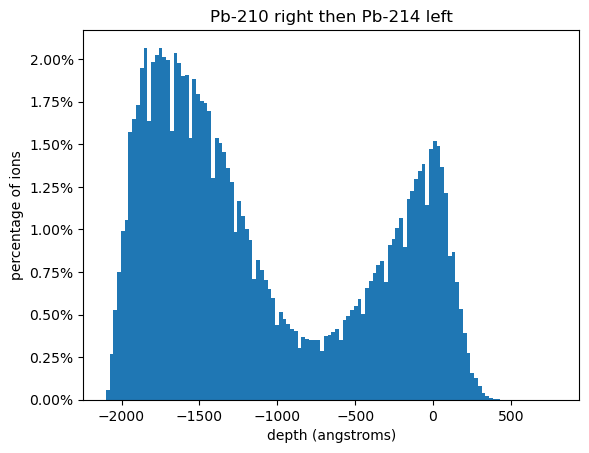

In [32]:
##plot the pb-210/pb-214 histogram
n = sum(cweights)
hfinal=plt.hist(hugeArray[:len(cweights)], bins=120, weights=cweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-210 right then Pb-214 left")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [33]:
min(h210500[0])

0.0

<function matplotlib.pyplot.show(close=None, block=None)>

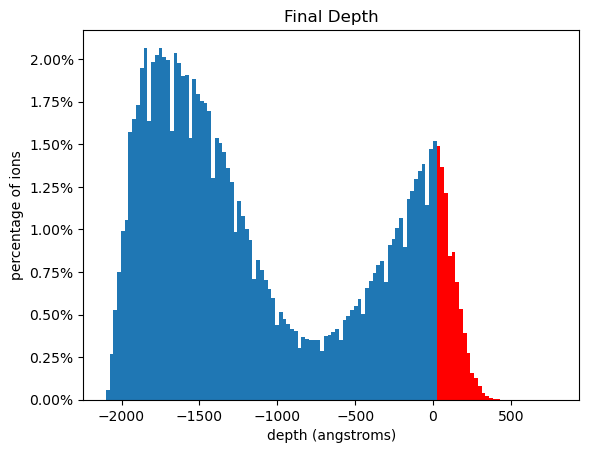

In [34]:
##all the bars in the aluminum will now be green
fig, ax = plt.subplots()
N, bins, patches=ax.hist(hugeArray[:len(cweights)], bins=120, weights=cweights/(n))
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Final Depth")
plt.gca().yaxis.set_major_formatter(pf(1))
for i in range(0,len(patches)):
    if hfinal[1][i] > 0:
       patches[i].set_facecolor('r')
plt.show

In [35]:
##calc the % of ions in the al
al=0
for x in range(len(h2142[0])):
    if hfinal[1][x] < 0:
        al += hfinal[0][x]
        x+=1

print("{}% of ions end in the LXe!".format(al*100))



IndexError: index 121 is out of bounds for axis 0 with size 121

In [36]:
##now we make the combined histogram of Pb-214+Pb-210
del hugeArray,cweights

hugeArray=[]
cweights=[]

for x in range(len(h2142[0])):
    if h2142[1][x] < 25:
        for y in range(len(h2100[0])):
            hugeArray=np.append(hugeArray,h2142[1][x]-h2100[1][y])
            cweights=np.append(cweights,h2142[0][x]*h2100[1][y])
            hugeArray=np.append(hugeArray,h2142[1][x]+h2100[1][y])
            cweights=np.append(cweights,h2142[0][x]*h2100[1][y])
    

<function matplotlib.pyplot.show(close=None, block=None)>

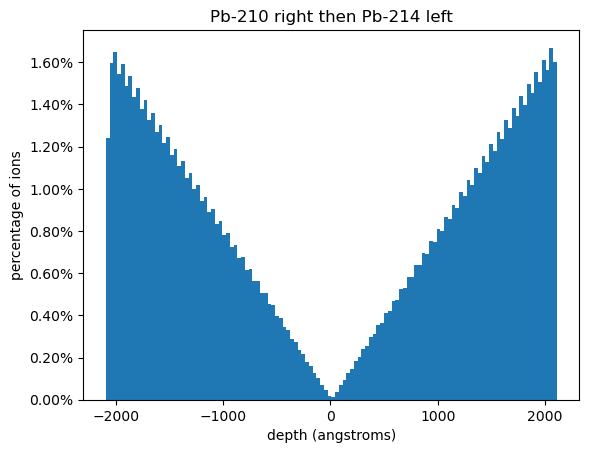

In [37]:
##plot the pb-210/pb-214 histogram
n = sum(cweights)
hfinal=plt.hist(hugeArray, bins=120, weights=cweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-210 right then Pb-214 left")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [38]:
j0=h2142[0]
j1=h2142[1]
ha=[]
cw=[]
ha1=[]
cw1=[]
ha2=[]
cw2=[]
cw3=[]




for i in range(0,5):
    for p in h2100[0]:
        pr = p*j0[i]
        cw1= np.append(cw1,pr)
    for d in h2100[1]:
        l = j1[i]-d
        ha1= np.append(ha1,l)
for i in range(5,15):
    for p in h21050[0]:
        pr = p*j0[i]
        cw2= np.append(cw2,pr)
    for d in h21050[1]:
        l = j1[i]-d
        ha2= np.append(ha2,l)
        
for i in range(len(cw1)):
    if ha1[i] < -1800:
        cw1[i] = 0
for i in range(len(cw2)):
    if ha2[i] < -1900:
        cw2[i] = 0

In [39]:
cw3=[]
ha3=[]

for i in range(15,25):
    for p in h210100[0]:
        pr = p*j0[i]
        cw3= np.append(cw3,pr)
    for d in h210100[1]:
        l = j1[i]-d
        ha3= np.append(ha3,l)

for i in range(len(cw3)):
    if ha3[i] < -1900:
        cw3[i] = 0

In [40]:
cw4=[]
ha4=[]

for i in range(25,35):
    for p in h210150[0]:
        pr = p*j0[i]
        cw4= np.append(cw4,pr)
    for d in h210150[1]:
        l = j1[i]-d
        ha4= np.append(ha4,l)

for i in range(len(cw4)):
    if ha4[i] < -1800:
        cw4[i] = 0

In [41]:
cw5=[]
ha5=[]

for i in range(35,45):
    for p in h210200[0]:
        pr = p*j0[i]
        cw5= np.append(cw5,pr)
    for d in h210200[1]:
        l = j1[i]-d
        ha5= np.append(ha5,l)

for i in range(len(cw5)):
    if ha5[i] < -1550:
        cw5[i] = 0

In [42]:
cw6=[]
ha6=[]

for i in range(45,55):
    for p in h210250[0]:
        pr = p*j0[i]
        cw6= np.append(cw6,pr)
    for d in h210250[1]:
        l = j1[i]-d
        ha6= np.append(ha6,l)

for i in range(len(cw6)):
    if ha6[i] < -1400:
        cw6[i] = 0

In [43]:
cw7=[]
ha7=[]

for i in range(55,65):
    for p in h210300[0]:
        pr = p*j0[i]
        cw7= np.append(cw7,pr)
    for d in h210300[1]:
        l = j1[i]-d
        ha7= np.append(ha7,l)

for i in range(len(cw7)):
    if ha7[i] < -1000:
        cw7[i] = 0

In [44]:
cw8=[]
ha8=[]

for i in range(65,75):
    for p in h210350[0]:
        pr = p*j0[i]
        cw8= np.append(cw8,pr)
    for d in h210350[1]:
        l = j1[i]-d
        ha8= np.append(ha8,l)

for i in range(len(cw8)):
    if ha8[i] < -750:
        cw8[i] = 0

In [45]:
cw9=[]
ha9=[]

for i in range(75,85):
    for p in h210400[0]:
        pr = p*j0[i]
        cw9= np.append(cw9,pr)
    for d in h210400[1]:
        l = j1[i]-d
        ha9= np.append(ha9,l)

for i in range(len(cw9)):
    if ha9[i] < -600:
        cw9[i] = 0

In [46]:
cw10=[]
ha10=[]

for i in range(85,95):
    for p in h210450[0]:
        pr = p*j0[i]
        cw10= np.append(cw10,pr)
    for d in h210450[1]:
        l = j1[i]-d
        ha10= np.append(ha10,l)

for i in range(len(cw10)):
    if ha10[i] < -1000:
        cw10[i] = 0

In [47]:
cw11=[]
ha11=[]

for i in range(95,100):
    for p in h210500[0]:
        pr = p*j0[i]
        cw11= np.append(cw11,pr)
    for d in h210500[1]:
        l = j1[i]-d
        ha11= np.append(ha11,l)

for i in range(len(cw11)):
    if ha11[i] < -1300:
        cw11[i] = 0

In [48]:
cw12=np.append(cw1,cw2)
ha12=np.append(ha1,ha2)
#for i in range(len(cw12)):
#    if ha12[i] < -1800:
#           cw12[i] = 0
cw13=np.append(cw12,cw3)
ha13=np.append(ha12,ha3)
for i in range(len(cw13)):
    if ha13[i] < -1700:
        cw13[i] = 0
cw14=np.append(cw13,cw4)
ha14=np.append(ha13,ha4)
for i in range(len(cw14)):
    if ha14[i] < -1650:
        cw14[i] = cw14[i]/80
cw15=np.append(cw14,cw5)
ha15=np.append(ha14,ha5)
for i in range(len(cw15)):
    if ha15[i] < -1520:
        cw15[i] = cw15[i]/50
cw16=np.append(cw15,cw6)
ha16=np.append(ha15,ha6)
for i in range(len(cw16)):
    if ha16[i] < -1390:
        cw16[i] = cw16[i]/60
cw17=np.append(cw16,cw7)
ha17=np.append(ha16,ha7)
for i in range(len(cw17)):
    if ha17[i] < -1245:
        cw17[i] = cw17[i]/30
cw18=np.append(cw17,cw8)
ha18=np.append(ha17,ha8)
for i in range(len(cw18)):
    if ha18[i] < -1100:
        cw18[i] = cw18[i]/8
        
cw19=np.append(cw18,cw9)
ha19=np.append(ha18,ha9)
for i in range(len(cw19)):
    if ha19[i] < -950:
        cw19[i] = cw19[i]/5

cw110=np.append(cw19,cw10)
ha110=np.append(ha19,ha10)
for i in range(len(cw110)):
    if ha110[i] < -995:
        cw110[i] = cw110[i]/4
    if ha110[i] < -790 and ha110[i] >= -990:
        cw110[i] = cw110[i]/2

cw=np.append(cw110,cw11)
ha=np.append(ha110,ha11)

#for i in range(len(ha)):
#    if ha[i] < -800 and ha[i] > -1100:
#        cw[i]=cw[i]-.000007


len(ha)

21100

<function matplotlib.pyplot.show(close=None, block=None)>

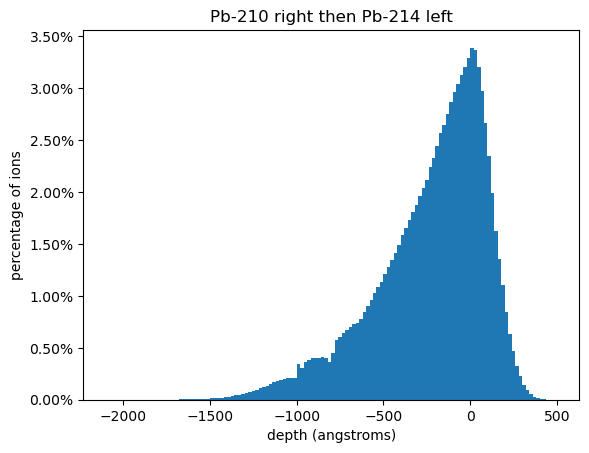

In [49]:
n2 = sum(cw)
w=20
hfinal=plt.hist(ha[:len(cw)], bins=np.arange(-2100,500+w,w), weights=cw/n2)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-210 right then Pb-214 left")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

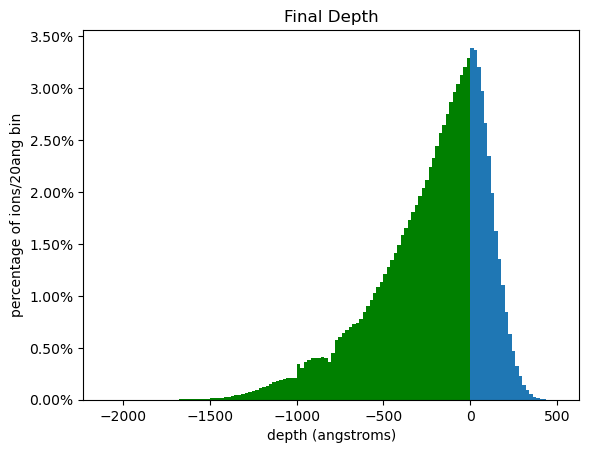

In [50]:
fig, ax = plt.subplots()
N, bins, patches=ax.hist(ha[:len(cw)], bins=np.arange(-2100,500+w,w), weights=cw/(n2))
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/20ang bin")
plt.title("Final Depth")
plt.gca().yaxis.set_major_formatter(pf(1))
for i in range(0,len(patches)):
    if hfinal[1][i] < 0:
       patches[i].set_facecolor('green')
plt.show

In [51]:
al=0
i=0
for item in hfinal[0][:-1]:
        if hfinal[1][i] < 0:
            al += item
        i+=1

print("{}% of ions end in the LXe!".format(al*100))



73.12740437040071% of ions end in the LXe!


In [52]:
f = open("C:\my214.txt", "w")
for a in h2142[0]:
    f.write(str(a))
    f.write(",")
f.close()

In [53]:
h2142[1][len(h2142[1])-1]

800

In [54]:
len(h2142[1])

161